In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
a = np.random.normal(0, 1, 1000000)
b = np.random.normal(2, 1, 1000000)

data = pd.DataFrame({
    'a': a,
    'b': b
}).melt()

data

,variable,value
0,a,1.764052
1,a,0.400157
2,a,0.978738
3,a,2.240893
4,a,1.867558
...,...,...
1999995,b,3.035327
1999996,b,1.506580
1999997,b,0.180091
1999998,b,1.669387


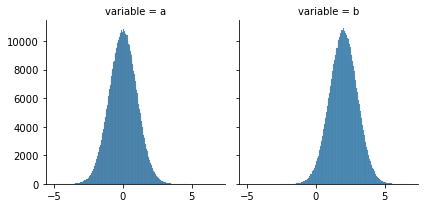

In [3]:
p = sns.FacetGrid(data, col='variable')
p.map_dataframe(sns.histplot, x='value');

## An AB test

In [4]:
a_sample = np.random.choice(list(a), 1000)
b_sample = np.random.choice(list(b), 1000)

b_sample.mean() - a_sample.mean()

2.0091029083514456

In [5]:
mean_a = a_sample.mean()
sd_a = a_sample.std()
n_a = len(a_sample)
mean_b = b_sample.mean()
sd_b = a_sample.std()
n_b = len(b_sample)

# t test
diff = mean_b - mean_a
se = np.sqrt(sd_a**2 / n_a + sd_b**2 / n_b)

print(f'diff: {round(diff, 4)} \t se: {round(se, 4)}')

diff: 2.0091 	 se: 0.0459


## Many AB tests

In [6]:
ab_diff_means = []

for i in range(5000):
    a_sample_ = np.random.choice(a, 1000)
    b_sample_ = np.random.choice(b, 1000)
    ab_diff_means.append(b_sample_.mean() - a_sample_.mean())

ab_diff_means[:5]

[1.960995370176192,
 1.9883898394478738,
 2.031780392370446,
 1.987619093692953,
 1.922992592703907]

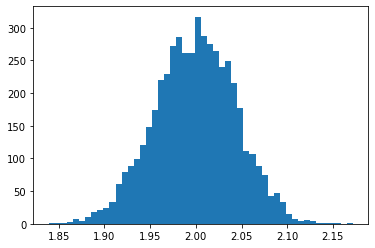

In [7]:
plt.hist(ab_diff_means, bins=50);

In [8]:
print(f'parameteric standard error: {round(se, 6)}, \n standard deviation of samp dist: {round(np.std(ab_diff_means), 6)}')

parameteric standard error: 0.045891, 
 standard deviation of samp dist: 0.044306


# Sampling dist of p

In [9]:
a_prop_population = np.random.binomial(1, 0.3, 1000000)
b_prop_population = np.random.binomial(1, 0.5, 1000000)

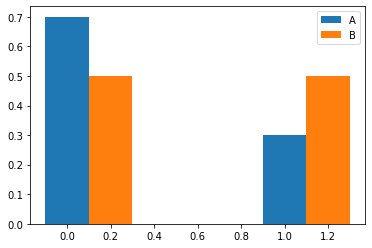

In [10]:
index = np.arange(0, 2)
a_heights = [1 - a_prop_population.mean(), a_prop_population.mean()]
b_heights = [1 - b_prop_population.mean(), b_prop_population.mean()]
bar_width = 0.2

plt.bar(index, a_heights, bar_width, label='A')
plt.bar(index + bar_width, b_heights, bar_width, label='B')
plt.legend();

In [11]:
a_sample_prop = np.random.choice(a_prop_population, 1000)
b_sample_prop = np.random.choice(b_prop_population, 1000)

a_prop = a_sample_prop.mean()
b_prop = b_sample_prop.mean()
ab_prop_diff = b_prop - a_prop

# binomial proportions test
a_prop_n = len(a_sample)
b_prop_n = len(b_sample)

ab_prop_se = np.sqrt(a_prop*(1-a_prop)/a_prop_n + b_prop*(1-b_prop)/b_prop_n)

In [12]:
ab_prop_diff

0.196

In [13]:
ab_prop_se

0.021466066244191086

# Sampling dist of p

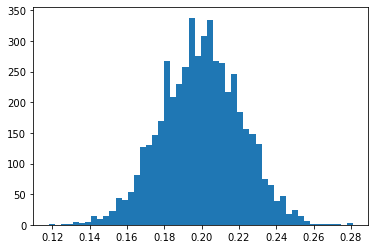

In [14]:
ab_diff_proportions = []
for i in range(5000):
    a_sample_ = np.random.choice(a_prop_population, 1000)
    b_sample_ = np.random.choice(b_prop_population, 1000)
    ab_diff_proportions.append(b_sample_.mean() - a_sample_.mean())

plt.hist(ab_diff_proportions, bins=50);

In [15]:
np.array(ab_diff_proportions).mean()

0.1997676

In [16]:
print(f'standard deviation of samp dist: {round(np.array(ab_diff_proportions).std(), 6)} \
      \n parameteric standard error: {round(ab_prop_se, 6)}')

standard deviation of samp dist: 0.021407       
 parameteric standard error: 0.021466
